# Analysis of Canada Stores Limited dataset.

> By Demorgan's Team
## Introduction
The dataset contains information about the employees of Canada Stores Limited.
> Our goal is to predict and analyze the factors that influence the levels of employee absenteeism at work. And then give recommendations to the management of Canada Stores Limited on how to reduce the level of employee absenteeism at work.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

df = pd.read_csv('data/AbsEmployees.csv')

# Drop columns that are not needed
df = df.drop(["EmployeeNumber", "Surname", "GivenName"], axis=1)

# Save a copy of the original data
DF_ORIGINAL = df.copy()

df.head()

,Gender,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,M,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,M,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,F,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,M,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


<!-- Wrangling and exploration -->
## Wrangling and exploration

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8336 non-null   object 
 1   JobTitle        8336 non-null   object 
 2   DepartmentName  8336 non-null   object 
 3   StoreLocation   8336 non-null   object 
 4   Division        8336 non-null   object 
 5   Age             8336 non-null   float64
 6   LengthService   8336 non-null   float64
 7   AbsentHours     8336 non-null   float64
 8   BusinessUnit    8336 non-null   object 
dtypes: float64(3), object(6)
memory usage: 586.2+ KB


> The dataset contains 8336 entries and 12 columns. All data types are correct.

> Also, there are no missing values in the dataset.

### Checking the distribution of the target variable

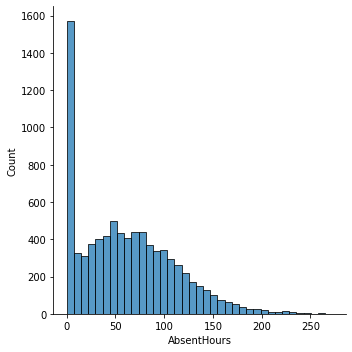

In [186]:
# Plot the distribution of the AbsentHours variable
sns.displot(data=df, x='AbsentHours')


> Since there are a lot of 0 values, it might seem that they are outliers. However, they might not.

> Let's plot a boxplot just in case.

<AxesSubplot:xlabel='AbsentHours'>

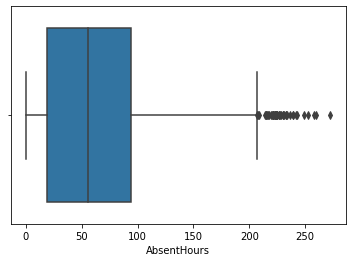

In [187]:
# Plot a boxplot of the AbsentHours variable
sns.boxplot(data=df, x='AbsentHours')

> As we thought, the 0 values are not outliers. They are just some employees who never missed work.

### Checking the distribution of the numerical variables

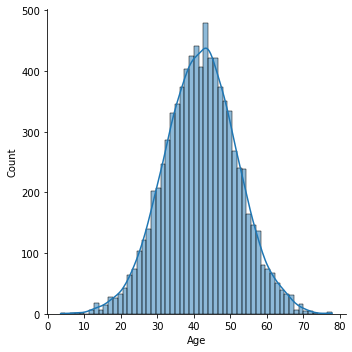

In [188]:
# Checking the distribution of the age column
sns.displot(data=df, x='Age', kde=True)


> Looks like that the ages are normally distributed, but here might be some outliers, let's check it by plotting a boxplot.

<AxesSubplot:xlabel='Age'>

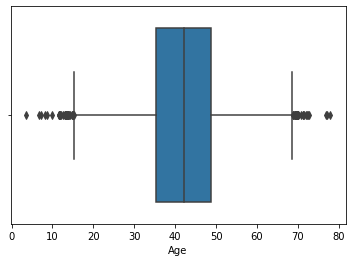

In [189]:
#boxplot of age
sns.boxplot(data=df, x='Age')

> Looks like we need to remove the outliers in the age column.
> No person less than 18 years old can work in Canada, so we need to remove the outliers.
> Also, any person older than 65 years old is considered to be a senior citizen, so we need to them too.

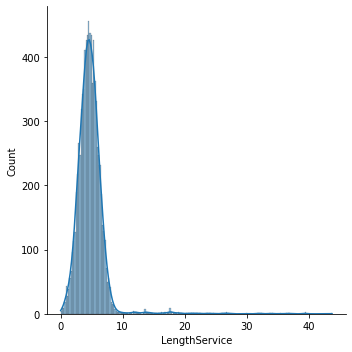

In [190]:
# plot lenght of service column
sns.displot(data=df, x='LengthService', kde=True)


<AxesSubplot:xlabel='LengthService'>

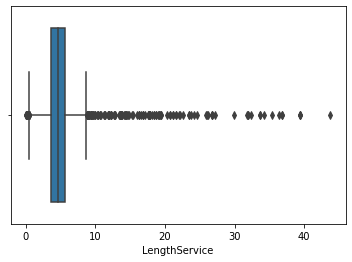

In [191]:
#boxplot of length of service
sns.boxplot(data=df, x='LengthService')


In [192]:
Q1, Q3 = np.percentile(df['LengthService'], [25, 75])

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# How many employees are above the upper bound?
above = df[df['LengthService'] > upper_bound].shape[0]
print(f'Employees above the upper bound: {above}')

# How many employees are below the lower bound?
below = df[df['LengthService'] < lower_bound].shape[0]
print(f'Employees below the lower bound: {below}')

# Percentage of employees who are outliers
outliers = (above + below) / df.shape[0]
print(f'Percentage of outliers: {outliers * 100:.2f}%')

Employees above the upper bound: 142
Employees below the lower bound: 21
Percentage of outliers: 1.96%


> Since the outliers only form less than 2% of the dataset, we can safely remove them.

In [193]:
def remove_outliers(df, col):
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

# Remove outliers from the LengthService column
df = remove_outliers(df, 'LengthService')

# Remove outliers from the Age column
df = remove_outliers(df, 'Age')

# Check how many employees are left
print(f'Employees left: {df.shape[0]}')

# Check how many records we have removed
print(f'Records removed: {DF_ORIGINAL.shape[0] - df.shape[0]}')


Employees left: 8109
Records removed: 227


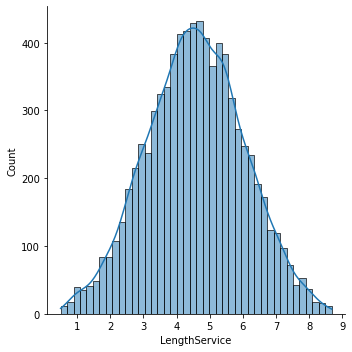

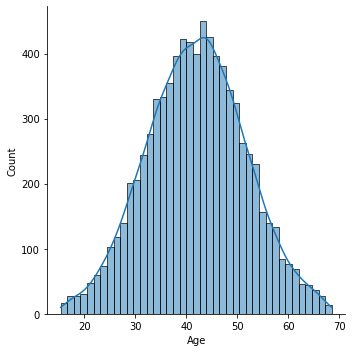

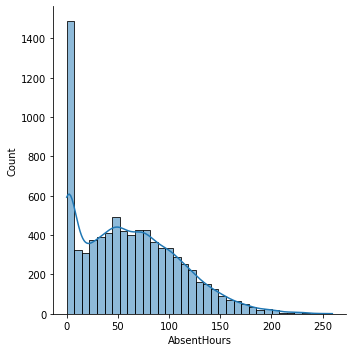

In [194]:
# Plot the distribution of the LengthService column
sns.displot(data=df, x='LengthService', kde=True)

# Plot the distribution of the Age column
sns.displot(data=df, x='Age', kde=True)

# Plot the distribution of the AbsentHours column
sns.displot(data=df, x='AbsentHours', kde=True)

> Now, the distributions make more sense.

### Checking the distribution of the categorical variables

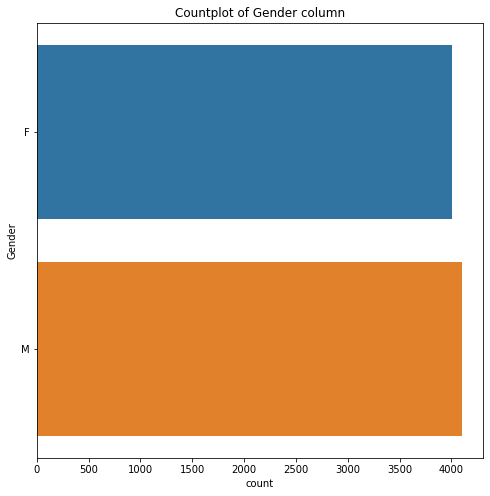

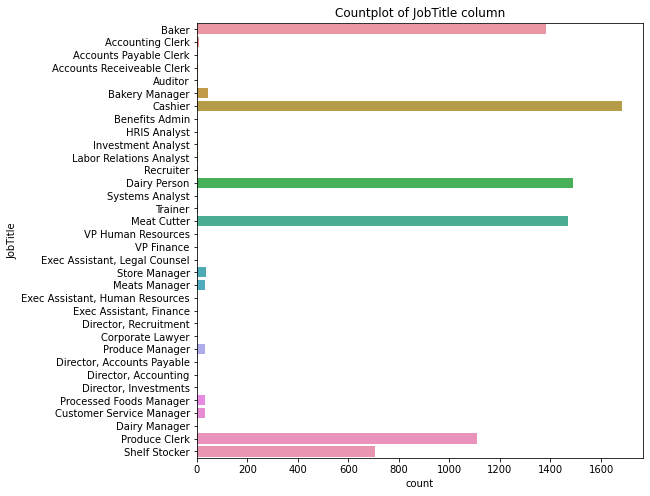

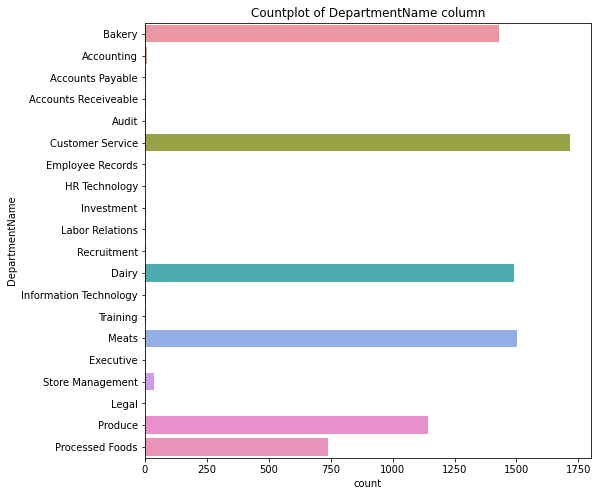

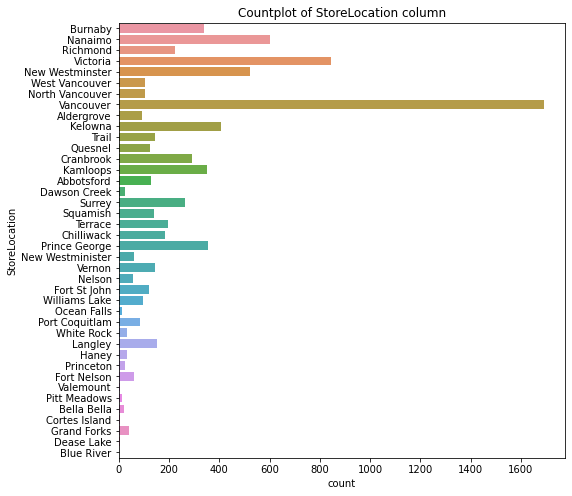

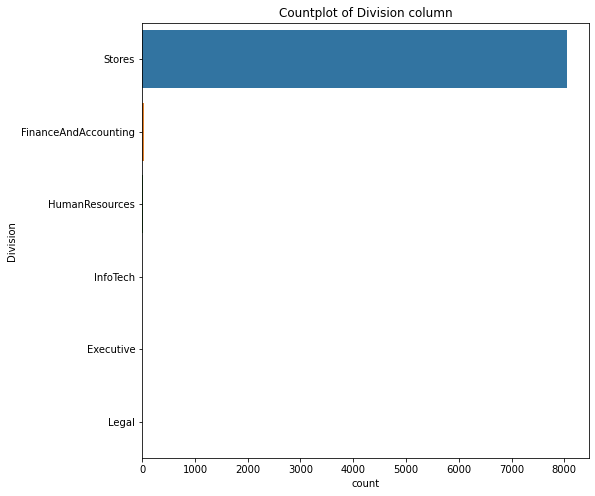

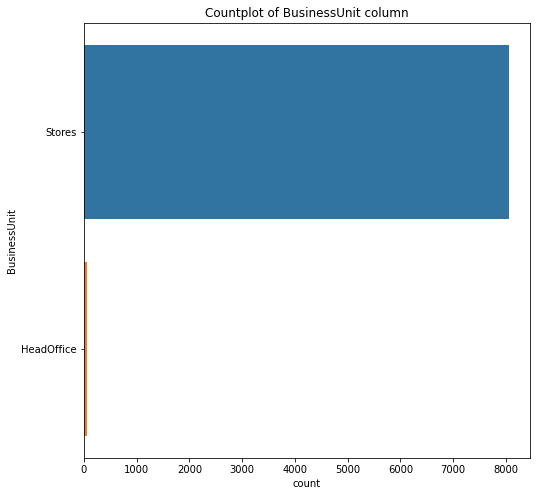

In [195]:
cat_cols = df.select_dtypes(include='object').columns

# Looping through the categorical columns and plot a countplot horizontally
for col in cat_cols:
    plt.figure(figsize=(8, 8))
    sns.countplot(data=df, y=col)
    plt.title(f'Countplot of {col} column')
    plt.show()

> The division and Business columns look a bit weird so let's check their valuesCounts().

In [196]:
df.Division.value_counts()

Stores                  8058
FinanceAndAccounting      27
HumanResources            15
Executive                  5
InfoTech                   3
Legal                      1
Name: Division, dtype: int64

In [197]:
df.BusinessUnit.value_counts()

Stores        8058
HeadOffice      51
Name: BusinessUnit, dtype: int64

In [198]:
# Adding up all values in df.Division.value_counts() except for "Stores"
stores = df.Division.value_counts()['Stores']
other = df.Division.value_counts().sum() - stores
other

51

> Looks like that the BusinessUnit column is redundant, since any Head Office employee works in a division other than a store.

> So we can safely remove the BusinessUnit column.

> Also, it is important to keep in mind that stores are the most frequent type of division. We need to be wary of this when we interpret the results.

In [199]:
# Drop BusinessUnit column
df = df.drop('BusinessUnit', axis=1)

In [200]:
# Check which job titles have the most absent hours
df.groupby('JobTitle')['AbsentHours'].mean().sort_values(ascending=False)


JobTitle
Dairy Manager                      192.402400
Trainer                            109.143654
Investment Analyst                 106.165919
Labor Relations Analyst             93.191834
Director, Recruitment               86.890269
HRIS Analyst                        80.196062
Exec Assistant, Legal Counsel       78.176135
Auditor                             75.389040
VP Human Resources                  71.063802
Exec Assistant, Human Resources     70.027356
VP Finance                          66.010946
Shelf Stocker                       63.054987
Cashier                             63.015094
Dairy Person                        62.897772
Meats Manager                       62.525832
Accounts Receiveable Clerk          62.518372
Baker                               61.523540
Benefits Admin                      60.252502
Meat Cutter                         59.664134
Produce Clerk                       59.231027
Recruiter                           56.933621
Customer Service Manager 

<AxesSubplot:title={'center':'JobTitle vs Average Absent Hours'}, ylabel='JobTitle'>

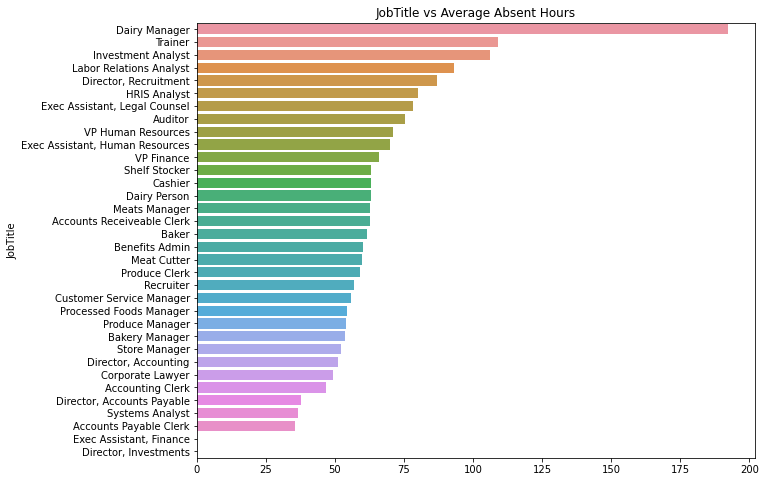

In [201]:
# Get the avg absent hours for each job title
avg_absent_hours = df.groupby('JobTitle')['AbsentHours'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title("JobTitle vs Average Absent Hours")
plt.ylabel("Average Absent Hours")
sns.barplot(x=avg_absent_hours.values, y=avg_absent_hours.index)

> Looks like that Dairy Managers have the highest average of absenteeism.

<AxesSubplot:title={'center':'The Average Abset Hours For Each Gender'}, xlabel='Average Absent Hours', ylabel='Gender'>

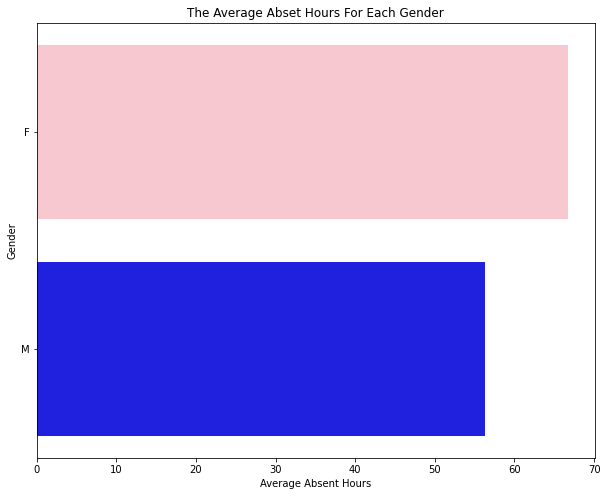

In [202]:
# Get the avg absent hours for gender
avg_absent_hours_gender = df.groupby('Gender')['AbsentHours'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title("The Average Abset Hours For Each Gender")
plt.xlabel("Average Absent Hours")
# Make F pink and M blue
sns.barplot(x=avg_absent_hours_gender.values, y=avg_absent_hours_gender.index, palette=['pink', 'blue'])

## Feature engineering

In [203]:
# Make a new column for is_labour

ALL_JOBS = df.JobTitle.unique()

# Create a list of labour jobs
labor_jobs = ['Baker', 'Cashier', 'Accounting Clerk', 'Accounts Payable Clerk', 'Accounts Receiveable Clerk', 'Dairy Person', 'Meat Cutter',
              'Produce Clerk', 'Shelf Stocker']

# Create a new column called is_labour
df['is_labour'] = df['JobTitle'].apply(lambda x: 1 if x in labor_jobs else 0)


# Create a list of analyst jobs
analyst_jobs = ['HRIS Analyst', 'Investment Analyst', 'Labor Relations Analyst', 'Systems Analyst']

# Create a new column called is_analyst
df['is_analyst'] = df['JobTitle'].apply(lambda x: 1 if x in analyst_jobs else 0)


# Create a list of manager jobs
manager_jobs = ['Bakery Manager', 'Store Manager', 'Meats Manager', 'Processed Foods Manager', 'Customer Service Manager', 'Dairy Manager',
                'Produce Manager']

# Create a new column called is_manager
df['is_manager'] = df['JobTitle'].apply(lambda x: 1 if x in manager_jobs else 0)


# Create a list of executive jobs
exec_jobs = ['VP Human Resources', 'VP Finance', 'Exec Assistant, Legal Counsel', 'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
                'Director, Recruitment', 'Corporate Lawyer', 'Director, Accounts Payable', 'Director, Accounting', 'Director, Investments']

# Create a new column called is_exec
df['is_exec'] = df['JobTitle'].apply(lambda x: 1 if x in exec_jobs else 0)
    
    
# Create a list of other jobs                
other_jobs = set(ALL_JOBS) - set(labor_jobs) - set(analyst_jobs) - set(manager_jobs) - set(exec_jobs)

# Create a new column called is_other
df['is_other'] = df['JobTitle'].apply(lambda x: 1 if x in other_jobs else 0)

# Drop the JobTitle column since we have created new columns using it
df.drop('JobTitle', axis=1, inplace=True)

> Now we have created 5 additional features using JobTitle column. Let's see their valuesCounts().

In [204]:
new_columns = ['is_labour', 'is_analyst', 'is_manager', 'is_exec', 'is_other']

# Loop through the new columns and display values counts
for col in new_columns:
    display(df[col].value_counts())


1    7856
0     253
Name: is_labour, dtype: int64

0    8096
1      13
Name: is_analyst, dtype: int64

0    7891
1     218
Name: is_manager, dtype: int64

0    8099
1      10
Name: is_exec, dtype: int64

0    8097
1      12
Name: is_other, dtype: int64

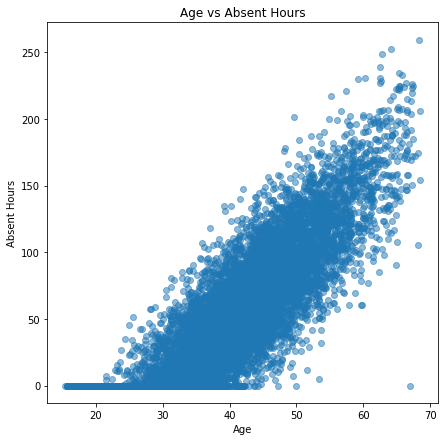

In [205]:
# Plot scatter plot of Age vs AbsentHours
plt.figure(figsize=(7, 7))
plt.title("Age vs Absent Hours")
plt.xlabel("Age")
plt.ylabel("Absent Hours")
plt.scatter(df.Age, df.AbsentHours, alpha=0.5)


## Relationship analysis

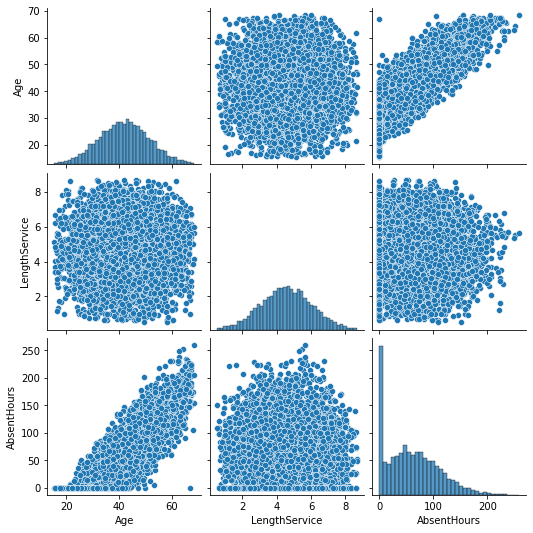

In [206]:
# Pair plot of the numerical columns
columns = ['Age', 'LengthService', 'AbsentHours']
sns.pairplot(data=df[columns])


> The relationship between the age and absent hours look linear, so we can use a linear regression model.

<AxesSubplot:>

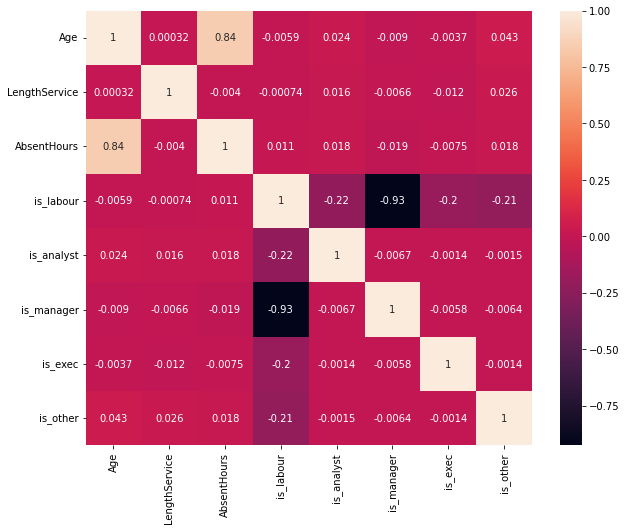

In [207]:
# Check the correlation between the numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)


> Looks like the age and absent hours are positively correlated.

#### Performing [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [208]:
# Doing Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe with only the numerical columns
df_num = df.select_dtypes(include='number') 
df_num = df_num.drop('AbsentHours', axis=1)

# Create a dataframe with the VIF values
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
vif['features'] = df_num.columns

# Print the dataframe
display(vif)


,VIF,features
0,1.002519,Age
1,1.001093,LengthService
2,28.887598,is_labour
3,1.059285,is_analyst
4,1.754798,is_manager
5,1.031920,is_exec
6,1.065765,is_other


> From the VIF result, we can see that there isa signs of multicollinearity with the is_labour column. So we need to remove it.

In [209]:
# Drop is_labour column
df = df.drop('is_labour', axis=1)

In [210]:
# Any other job title that is not in the top 5 should be labeled as "Other"
top_6 = df.DepartmentName.value_counts().index[:5]
df['DepartmentName'] = df['DepartmentName'].apply(lambda x: x if x in top_6 else 'Other')

# Any other store location that is not in the top 7 should be labeled as "Other"
top_10 = df.StoreLocation.value_counts().index[:7]
df['StoreLocation'] = df['StoreLocation'].apply(lambda x: x if x in top_10 else 'Other')

# Any other department name that is not in the top 5 should be labeled as "Other"
top_6 = df.DepartmentName.value_counts().index[:5]
df['DepartmentName'] = df['DepartmentName'].apply(lambda x: x if x in top_6 else 'Other')


In [211]:
# Now we will dummy encode the categorical columns
df = pd.get_dummies(df, drop_first=True)

display(df.head())
#rename Gender_M to Gender
df.rename(columns={'Gender_M': 'Gender'}, inplace=True)
df.columns, len(df.columns)

,Age,LengthService,AbsentHours,is_analyst,is_manager,is_exec,is_other,Gender_M,DepartmentName_Customer Service,DepartmentName_Dairy,...,StoreLocation_New Westminster,StoreLocation_Other,StoreLocation_Prince George,StoreLocation_Vancouver,StoreLocation_Victoria,Division_FinanceAndAccounting,Division_HumanResources,Division_InfoTech,Division_Legal,Division_Stores
0,32.028816,6.018478,36.577306,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,40.320902,5.532445,30.165072,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,48.822047,4.389973,83.807798,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,44.599357,3.081736,70.020165,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,35.697876,3.619091,0.000000,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


(Index(['Age', 'LengthService', 'AbsentHours', 'is_analyst', 'is_manager',
        'is_exec', 'is_other', 'Gender', 'DepartmentName_Customer Service',
        'DepartmentName_Dairy', 'DepartmentName_Meats', 'DepartmentName_Other',
        'DepartmentName_Produce', 'StoreLocation_Kelowna',
        'StoreLocation_Nanaimo', 'StoreLocation_New Westminster',
        'StoreLocation_Other', 'StoreLocation_Prince George',
        'StoreLocation_Vancouver', 'StoreLocation_Victoria',
        'Division_FinanceAndAccounting', 'Division_HumanResources',
        'Division_InfoTech', 'Division_Legal', 'Division_Stores'],
       dtype='object'),
 25)

### Trying Linear Regression

In [212]:
from sklearn.model_selection import train_test_split
# Scaling
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LinearRegression

# Split the data into X and y
X = df.drop('AbsentHours', axis=1)
y = df['AbsentHours']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Get the predictions
y_pred = model.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error


training_score = model.score(X_train, y_train)

testing_score = model.score(X_test, y_test)

print(f'Training score: {training_score:.4f}')

print(f'Testing score: {testing_score:.4f}')

print(f'R2 score: {r2:.4f}')

Training score: 0.7347
Testing score: 0.7567
R2 score: 0.7567


> We got a R2 of 0.7567, which means that our model explains 75.67% of the variance in the absent hours.

### Trying Random Forest

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create the model
model = DecisionTreeRegressor()

# Create the parameters
params = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV
grid = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)
# Get the best parameters
grid.best_params_
# Get the best score
grid.best_score_

# Get the predictions
y_pred = grid.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

Fitting 5 folds for each of 525 candidates, totalling 2625 fits


0.7782078731639133

> We got a better result with Random Forest, with R2 = 0.7782, which means that our Random Forest model explains 77.82% of the variance in the absent hours.

### Trying XGBoost

In [214]:

from xgboost import XGBRegressor


best_params = {'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_alpha': 1,
 'subsample': 0.8}

# Create the model
model = XGBRegressor(**best_params)


model.fit(X_train, y_train)

# Get the predictions
y_pred = model.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

0.7797464712073842

> Our result in XGBoost is even better, with R2 = 0.7797, which means that our XGBoost model explains 77.97% of the variance in the absent hours.

In [215]:
# Coefficients of the XGBoost model
cols = df.columns
cols = cols.drop('AbsentHours')
coefs = model.feature_importances_
coefs = pd.DataFrame(coefs, index=cols, columns=['coefs'])

coefs = coefs.sort_values(by='coefs', ascending=False)
 
coefs

,coefs
Age,0.730464
Gender,0.082278
is_other,0.040639
Division_Stores,0.029601
LengthService,0.015808
is_manager,0.009501
DepartmentName_Other,0.009488
is_exec,0.009230
StoreLocation_Victoria,0.008826
DepartmentName_Customer Service,0.008755


### Trying CatBoostRegressor

In [216]:
# Import catboost
from catboost import CatBoostRegressor

# Create the model
model = CatBoostRegressor()

X = df.drop('AbsentHours', axis=1)
y = df['AbsentHours']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

params = {
    'depth': [5],
    'learning_rate': [0.05],
    'iterations': [150],
}

# Create the GridSearchCV
grid_cat = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=0)

# Fit the model
grid_cat.fit(X_train, y_train)

# Get the best parameters
grid_cat.best_params_

# Get the best score
grid_cat.best_score_

# Get the predictions
y_pred = grid_cat.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

0:	learn: 46.6516752	total: 1.65ms	remaining: 246ms
1:	learn: 45.0976532	total: 3.94ms	remaining: 291ms
2:	learn: 43.6155520	total: 5.51ms	remaining: 270ms
3:	learn: 42.2566618	total: 7.07ms	remaining: 258ms
4:	learn: 40.9665339	total: 8.73ms	remaining: 253ms
5:	learn: 39.7264573	total: 10.7ms	remaining: 257ms
6:	learn: 38.5555888	total: 12.3ms	remaining: 251ms
7:	learn: 37.5577213	total: 13.8ms	remaining: 245ms
8:	learn: 36.5776398	total: 15.4ms	remaining: 241ms
9:	learn: 35.6960396	total: 16.8ms	remaining: 236ms
10:	learn: 34.7895634	total: 18.5ms	remaining: 234ms
11:	learn: 33.9713734	total: 20ms	remaining: 230ms
12:	learn: 33.2308734	total: 21.6ms	remaining: 228ms
13:	learn: 32.5029841	total: 23.1ms	remaining: 224ms
14:	learn: 31.8280075	total: 24.6ms	remaining: 222ms
15:	learn: 31.1948710	total: 26.2ms	remaining: 220ms
16:	learn: 30.6179388	total: 28.2ms	remaining: 220ms
17:	learn: 30.0891633	total: 29.8ms	remaining: 218ms
18:	learn: 29.6019297	total: 31.7ms	remaining: 219ms
19:	l

0.782828887576845

> CatBoostRegressor gave us the best result, with R2 = 0.7828, which means that our CatBoostRegressor model explains 78.28% of the variance in the absent hours.

In [217]:
# Coeffecients of regression from catboost
cols = df.columns
cols = cols.drop('AbsentHours')
coefs = grid_cat.best_estimator_.feature_importances_
coefs = pd.DataFrame(coefs, index=cols, columns=['coefs'])

coefs = coefs.sort_values(by='coefs', ascending=False)

coefs


,coefs
Age,87.369605
Gender,10.480925
LengthService,0.813648
Division_Stores,0.369166
Division_HumanResources,0.121974
DepartmentName_Produce,0.109308
DepartmentName_Customer Service,0.102190
is_manager,0.075159
DepartmentName_Meats,0.070952
DepartmentName_Other,0.069333


### Trying Linear Regression again with Cross Validation and only 'Age' column

In [218]:
# Try regression with X1 = age, X2 = LengthService
# Y = AbsentHours

# Create the model
model = LinearRegression()

# Fit the model
X = df[['Age']]
y = df['AbsentHours']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Get the best parameters
grid.best_params_

# Get the best score
grid.best_score_

# Get the predictions
y_pred = grid.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.6818393355590955

> Looks like that the 'Age' column can explain 73.31% of the variance in the absent hours.

> This proves that Age alone is a huge factor in predicting the absent hours.


# Conclusion

1. According to the coefficients of the regression models, the most important factor is the age of the employee.
2. Also, the second most important factor is gender of the employee. 

3. We also found out that Dairy Managers have the highest average of absenteeism by a big margin.
4. And we found that Females have a higher average of absenteeism by a small margin.


> We can conclude that the older the employee is, the more likely they are to miss work.


> We also found that [CatBoostRegressor](https://catboost.ai/en/docs/) fits the dataset best, with R2 = 0.7828, which means that our CatBoostRegressor model explains 78.28% of the variance in the absent hours.


# Recommendations

> We recommend that the company should research ways to reduce the absenteeism of older employees.

> Also, we recommend that the company should hire more young people.

> Additionally, we suggest that the company should make the workplace female-friendly, since we showed that females have a higher average of absenteeism.